In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('train.csv', index_col=0)
train.head()

,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
id,,,,,,,,,,,,,,,,,,,,,
2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv('test.csv', index_col=0)
test.head()

,SMILES,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
id,,,,,,,,,,,,,,,,,,,,,
1022,CCOC(=O)c1ccc(O)cc1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1146,CCCCCCc1ccc(O)cc1O,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,ClCBr,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2279,C=CCCCCCCCC,1,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1342,Fc1ccc(cc1)C(F)(F)F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.drop('SMILES', axis=1, inplace=True)
test.drop('SMILES', axis=1, inplace=True)

In [9]:
train.describe()

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,...,2662.000000,2662.000000,2662.0,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,278.263452,1.020661,1.582269,0.114951,0.036439,0.036814,0.022915,0.013524,0.010143,0.007137,...,0.001127,0.000751,0.0,0.001878,0.0,0.0,0.0,0.0,0.0,0.0
std,85.117914,1.353640,3.738416,0.425964,0.208307,0.205516,0.164037,0.118732,0.117480,0.092695,...,0.033558,0.027405,0.0,0.058126,0.0,0.0,0.0,0.0,0.0,0.0
min,53.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,277.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,325.150000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,897.150000,16.000000,42.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2662 entries, 2175 to 1673
Columns: 425 entries, Tm to Group 424
dtypes: float64(1), int64(424)
memory usage: 8.7 MB


C:\Users\Avishka\AppData\Local\Temp\ipykernel_30300\2446559757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Tm'], color = 'red')


<Axes: xlabel='Tm', ylabel='Density'>

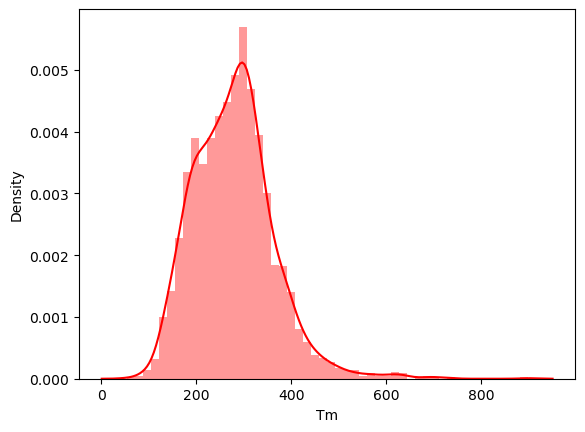

In [11]:
sns.distplot(train['Tm'], color = 'red')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = train.drop('Tm', axis=1)
y = train['Tm'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linreg = LinearRegression()
linreg.fit(scaled_x_train, y_train)
pred = linreg.predict(scaled_x_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error